### Cel Badania

Poniższe badanie ma na celu uszeregowanie najlepszych zawodników ofensywnych w Premier League w sezonach 2021/2022 oraz 2022/2023. 

### Dane

Dane zostały pozyskane ze strony https://fbref.com/ będącą bazą danych na temat rozgrywek piłkarskich. Do badania wybrano 15 piłkarzy którzy grali w obu sezonach oraz zdobyli największą liczbę bramek w sezonie 2021/2022.

### Zmienne 
Do badania wybrano osiem zmiennych diagnostycznych. W tym pięć stymulant i trzy destymulanty.

#### Stymulanty
* 'Minutes Played' (Minuty spędzone na boisku): Czas spędzony na boisku świadczy o staminie, odporności na kontuzje oraz klasie zawodnika.
* 'Assists' (Asysty): Asysty są ważne dla ofensywy, ponieważ pokazują zdolność zawodnika do współpracy z innymi, co prowadzi do zdobywania bramek przez współgraczy.
* 'Goals' (Bramki): Określa liczbę bramek zdobytych przez zawodnika.
* 'Progressive Carries' (Postępowe przenoszenia piłki): Wskazuje, jak skutecznie zawodnik prowadzi piłkę w sposób progresywny, co może przyczynić się do stworzenia sytuacji bramkowej.
* 'Progressive Passes' (Progresywne podania): Liczba udanych progresywnych podań może świadczyć o umiejętnościach zawodnika w tworzeniu skutecznych akcji ofensywnych.

#### Destymulany
* 'Yellow Cards' (Żółte kartki): Kartki mogą wpływać na dostępność zawodnika w kolejnych meczach, co może mieć wpływ na jego zdolność do zdobywania bramek. Ograniczają również możliwości drużyny.
* 'Red Cards' (Czerwone kartki): Tak jak żółte kartki, czerwone kartki mogą wpływać na dostępność zawodnika i ogólną skuteczność drużyny w ofensywie.
* 'Penalties Missed' (Niewykorzystane rzuty karne): Pokazuje niewykorzystanie przez zawodnika wypracowanego przez drużynę stałego fragmentu gry. Świadczy o braku opanowania lub problemach z wykończeniem.

In [1]:
import pandas as pd
import os
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
current_directory = os.getcwd()
print("Current Directory:", current_directory)

# Load the Excel file into pandas dataframes, skipping headers and subheaders
file_path = '/kaggle/input/premierleague/PremierLeagueStats.xlsx'  # Replace with the actual path to your Excel file
df1 = pd.read_excel(file_path, sheet_name='2021-2022', skiprows=1)  # Adjust skiprows as needed
df2 = pd.read_excel(file_path, sheet_name='2022-2023', skiprows=1)  # Adjust skiprows as needed

df1.head()

Current Directory: /kaggle/working


,Rk,Player,Nation,Pos,Squad,Age,Born,MP,Starts,Min,...,Assists/90,Goals + Assists/90,Non Penalty Goals/90,Non Penalty Goals Plus Assists/90,Expected Goals/90,Expected Assists/90,Expected Calls Plus Assists/90,Expected Non Penalty Goals/90,Expected Non Penalty Goals Plus Assists/90,Matches
0,215.0,Son Heung-min,kr KOR,"MF,FW",Tottenham,29.0,1992.0,35.0,35.0,3006.0,...,0.21,0.90,0.69,0.90,0.48,0.22,0.70,0.48,0.70,Matches
1,429.0,Mohamed Salah,eg EGY,FW,Liverpool,29.0,1992.0,35.0,30.0,2762.0,...,0.42,1.17,0.59,1.01,0.74,0.33,1.07,0.58,0.91,Matches
2,418.0,Cristiano Ronaldo,pt POR,FW,Manchester Utd,36.0,1985.0,30.0,27.0,2456.0,...,0.11,0.77,0.55,0.66,0.65,0.11,0.75,0.56,0.67,Matches
3,248.0,Harry Kane,eng ENG,FW,Tottenham,28.0,1993.0,37.0,36.0,3232.0,...,0.25,0.72,0.36,0.61,0.52,0.25,0.77,0.43,0.68,Matches
4,305.0,Sadio Mané,sn SEN,FW,Liverpool,29.0,1992.0,34.0,32.0,2819.0,...,0.06,0.57,0.51,0.57,0.55,0.17,0.72,0.55,0.72,Matches


In [2]:
# Assuming your data has columns like 'Player', 'Goals', and other relevant stats
# You can adjust these column names based on your actual data
key_columns = ['Player', 'Goals']

# Filter the top 15 players from the first season
top_players_season1 = df1.nlargest(15, 'Goals')[key_columns]

# Filter players who played in both seasons
common_players = pd.merge(top_players_season1, df2, on='Player', how='inner', suffixes = ('_21', '_22'))

# Now you have a dataframe with the top 15 players from season 1 who played in season 2
# You can compare their stats as needed

# For example, let's print the comparison for the 'Goals' stat
for index, row in common_players.iterrows():
    player = row['Player']
    goals_season1 = row['Goals_21']
    goals_season2 = row['Goals_22']
    print(f"{player}: Goals in Season 1 - {goals_season1}, Goals in Season 2 - {goals_season2}")

Son Heung-min: Goals in Season 1 - 23.0, Goals in Season 2 - 10
Mohamed Salah: Goals in Season 1 - 23.0, Goals in Season 2 - 19
Cristiano Ronaldo: Goals in Season 1 - 18.0, Goals in Season 2 - 1
Harry Kane: Goals in Season 1 - 17.0, Goals in Season 2 - 30
Kevin De Bruyne: Goals in Season 1 - 15.0, Goals in Season 2 - 7
Diogo Jota: Goals in Season 1 - 15.0, Goals in Season 2 - 7
Jamie Vardy: Goals in Season 1 - 15.0, Goals in Season 2 - 3
Wilfried Zaha: Goals in Season 1 - 14.0, Goals in Season 2 - 7
Raheem Sterling: Goals in Season 1 - 13.0, Goals in Season 2 - 6
Jarrod Bowen: Goals in Season 1 - 12.0, Goals in Season 2 - 6
James Maddison: Goals in Season 1 - 12.0, Goals in Season 2 - 10
Ivan Toney: Goals in Season 1 - 12.0, Goals in Season 2 - 20
Riyad Mahrez: Goals in Season 1 - 11.0, Goals in Season 2 - 5
Mason Mount: Goals in Season 1 - 11.0, Goals in Season 2 - 3


In [3]:
df1 = df1.loc[df1['Player'].isin(common_players['Player']), ['Player', 'Min', 'Goals', 'Assists', 'Non Penalty Goals', 'Penelty Kicks Made', 'Penalty Kicks Attended','Yellow Cards', 
    'Red Cards', 'Progressive Carries', 'Progressive Passes']]

df2 = df2.loc[df2['Player'].isin(common_players['Player']), ['Player', 'Min', 'Goals', 'Assists', 'Non Penalty Goals', 'Penelty Kicks Made', 'Penalty Kicks Attended','Yellow Cards', 
    'Red Cards', 'Progressive Carries', 'Progressive Passes']]

In [4]:
df1['Penalties Missed'] = df1['Penalty Kicks Attended']-  df1['Penelty Kicks Made']
df2['Penalties Missed'] = df2['Penalty Kicks Attended']-  df2['Penelty Kicks Made']

df1 = df1[['Player', 'Min', 'Goals', 'Assists', 'Progressive Carries', 'Progressive Passes','Yellow Cards', 
    'Red Cards', 'Penalties Missed']]
df2 = df2[['Player', 'Min', 'Goals', 'Assists',  'Progressive Carries', 'Progressive Passes','Yellow Cards', 
    'Red Cards', 'Penalties Missed']]

In [5]:
# Columns to standardize and unitarize
columns_to_scale = ['Min', 'Goals', 'Assists', 
                    'Progressive Carries', 'Progressive Passes',
                    'Yellow Cards', 'Red Cards', 'Penalties Missed']

# Standardize and unitarize for Season 1
scaler_standardize = StandardScaler()
scaler_unitarize = MinMaxScaler()

# Standardize
df1_standardized = df1.copy()
df1_standardized[columns_to_scale] = scaler_standardize.fit_transform(df1[columns_to_scale])

# Unitarize
df1_unitarized = df1.copy()
df1_unitarized[columns_to_scale] = scaler_unitarize.fit_transform(df1[columns_to_scale])

# Standardize and unitarize for Season 2
df2_standardized = df2.copy()
df2_standardized[columns_to_scale] = scaler_standardize.transform(df2[columns_to_scale])

df2_unitarized = df2.copy()
df2_unitarized[columns_to_scale] = scaler_unitarize.transform(df2[columns_to_scale])

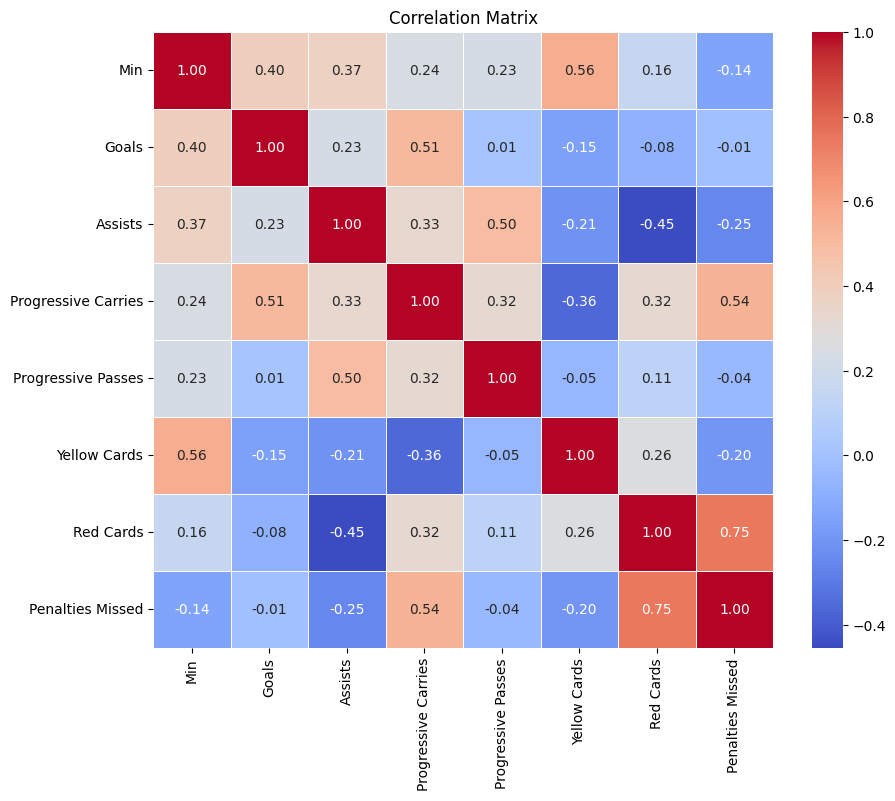

In [6]:
correlation_matrix = df1[columns_to_scale].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()